<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo2/desafios/Desafio_aula4_modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Pre-analise

---
## 1.1) Funções de apoio
---

---

---
## 1.2) Bibliotecas utilizadas

* searborn
* pandas
* matplotlib
* datatime
---

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# pandas configuracao
pd.options.display.float_format  ="{:,.2f}".format

---

---
## 1.3) Preparação dos dados 
---

In [3]:
uri = "https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo2/desafios/mensal_aberto.csv"

dados = pd.read_csv(uri, usecols=["mes", "uf", "gasto"], index_col="mes")

dados.head()

,uf,gasto
mes,,
2008-02-01,São Paulo,172.83
2008-03-01,São Paulo,170.48
2008-04-01,São Paulo,170.28
2008-05-01,São Paulo,172.40
2008-06-01,São Paulo,175.42


In [4]:
dados.index = pd.to_datetime(dados.index)

# 2) Desafios

---
## 2.1) Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.
---



In [5]:
import datetime 

from datetime import timedelta

periodo_de_tempo = timedelta(days=14)

print(f"14 Dias tem {periodo_de_tempo.total_seconds()} segundos")

14 Dias tem 1209600.0 segundos


---
## 2.2) Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.
---

In [6]:
dados.pivot(columns='uf', values='gasto')

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,7.93,8.28,70.30,48.86,10.87,20.13,26.22,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.41,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,9.45,10.26,79.61,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,2.86,16.00,2.29,14.77,70.34,46.40,19.41,26.56,34.56,28.83,14.44,17.36,147.08,114.48,17.61,34.75,59.63,15.32,20.94,84.65,73.59,7.17,2.81,56.71,9.19,276.61,7.03
2020-04-01,2.47,14.24,1.77,16.33,59.11,43.47,18.12,23.74,27.50,23.94,11.94,15.65,126.33,96.73,15.39,28.71,53.84,11.88,17.32,76.29,68.16,7.42,2.30,51.18,8.40,251.70,6.20
2020-05-01,2.38,15.25,2.70,19.44,61.76,54.20,21.44,28.61,31.87,32.98,13.98,16.70,136.87,106.10,18.97,41.25,65.42,14.18,19.92,86.08,86.28,8.58,2.91,56.84,8.45,302.86,6.73


---

## 2.3) Desafio 03: Melhorar o gráfico da distribuição do gráfico:

* Escolha apenas alguns estados.
* Mude a palete de cores.
* Posicione a legenda de forma mais adequada.
* Adicione título principal e nos eixos x e y.

---

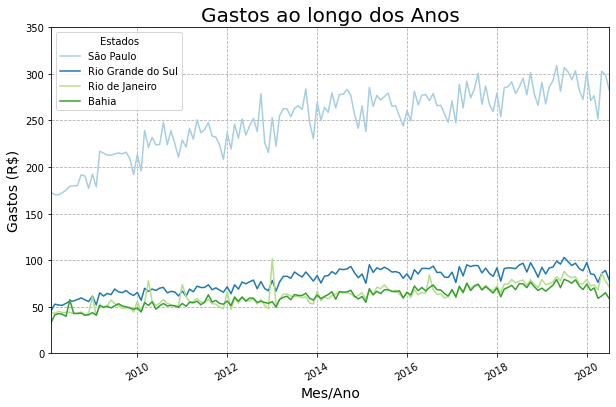

In [12]:
plt.figure(figsize=(10,6))
estados = ['São Paulo', 'Rio Grande do Sul', 'Rio de Janeiro', 'Bahia']

ax = sns.lineplot(data = dados.query("uf == @estados"), 
                  x="mes", 
                  y="gasto", 
                  hue='uf', 
                  palette=sns.color_palette("Paired", 4))
plt.xticks(rotation=30)


plt.title("Gastos ao longo dos Anos", fontsize=20)
plt.ylabel("Gastos (R$)", fontsize=14)
plt.xlabel("Mes/Ano", fontsize=14)


from datetime import date
data_inicio = date(2008, 2, 1)
data_final  = date(2020, 7, 1)


plt.ylim(0, 350)
plt.xlim(data_inicio, data_final)

plt.legend(title='Estados')
plt.grid(True, ls="--")
plt.show()